In [12]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
## Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
# Modelos de clasificacion
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression
## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score, log_loss
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
import cufflinks as cf
cf.set_config_file(offline = True)

Solo iberdrola aunque hay que entrenar todo el modelo. Análisis rendimiento tendencias

Vamos a ver el rendimiento del modelo general cuando IBERDROLA tiene tendencias alcista, bajista, sin tendencia definida
- Bajista: 1/11/2007 a 1/11/2008
- Alcista: 1/08/2012 a 1/08/2015
- Sin tendencia definida: 1/03/2009 a 1/02/2012

In [13]:
df = pd.read_csv("acciones_preprocesado.csv")
# quito los que devuelve 0 la dirección ya que no me calcula bien las métricas de los modelos
df = df[df.direction != 0]
df = df.sort_values(by="date")
#fecha_inicio = "2018-11-01"
#fecha_fin = "2020-02-01"
#df = df[(df['date'] >= fecha_inicio) & (df['date'] <= fecha_fin)].copy()
df.reset_index(inplace=True, drop=True)
df

,accion,date,price,returns,price_lag1,high_lag1,low_lag1,direction,lag1,lag2,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,REP.MC,2010-10-20,8.323917,0.004088,8.289959,19.885000,19.420000,1.0,-0.017008,0.004541,...,20.530001,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
1,IBE.MC,2010-10-20,3.034428,-0.001024,3.037537,5.907000,5.824000,-1.0,-0.001534,0.003755,...,5.907000,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
2,SAN.MC,2010-10-20,4.175534,-0.000624,4.178143,9.111239,8.860599,-1.0,0.008142,0.006414,...,9.111239,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
3,TEF.MC,2010-10-20,7.717547,-0.000258,7.719536,19.274195,19.056686,-1.0,-0.003860,0.001028,...,19.407665,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
4,SAN.MC,2010-10-21,4.156858,-0.004483,4.175534,8.957142,8.790048,-1.0,-0.000624,0.008142,...,9.111239,2010,294,42,-8.660254e-01,0.5,-0.897805,-0.440394,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,AAPL,2023-12-29,192.284637,-0.005439,193.333298,194.660004,193.169998,-1.0,0.002224,0.000518,...,199.619995,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969
16675,IBE.MC,2023-12-29,11.670105,0.003798,11.625863,11.910000,11.820000,1.0,-0.000845,-0.002110,...,12.015000,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969
16676,SAN.MC,2023-12-29,3.705476,-0.002114,3.713319,3.817500,3.775000,-1.0,-0.005923,0.000525,...,3.966500,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969
16677,REP.MC,2023-12-29,13.053245,-0.001486,13.072656,13.750000,13.465000,-1.0,-0.022753,0.010578,...,14.010000,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969


Lo primero que voy a hacer es transformar la fecha para poder meterla como variable numérica 

Ahora voy a separar los data frames en:
1.- variables categóricas para hacerle onehotencoding
2.- variables numéricas para aplicarle escaladores
3.- variables seno y cosenoidales que no se transforman ya más
4.- variable objetivo (dirección)

In [14]:
df[df.accion == "REP.MC"]

,accion,date,price,returns,price_lag1,high_lag1,low_lag1,direction,lag1,lag2,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,REP.MC,2010-10-20,8.323917,0.004088,8.289959,19.885000,19.420000,1.0,-0.017008,0.004541,...,20.530001,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
5,REP.MC,2010-10-21,8.336652,0.001529,8.323917,19.620001,19.355000,1.0,0.004088,-0.017008,...,20.530001,2010,294,42,-8.660254e-01,0.5,-0.897805,-0.440394,0.433884,-0.900969
10,REP.MC,2010-10-22,8.326039,-0.001274,8.336652,19.750000,19.434999,-1.0,0.001529,0.004088,...,20.530001,2010,295,42,-8.660254e-01,0.5,-0.968077,-0.250653,-0.433884,-0.900969
14,REP.MC,2010-10-25,8.323917,-0.000255,8.326039,19.799999,19.459999,-1.0,-0.001274,0.001529,...,20.530001,2010,298,43,-8.660254e-01,0.5,-0.937752,0.347305,0.000000,1.000000
18,REP.MC,2010-10-26,8.272981,-0.006138,8.323917,19.790001,19.540001,-1.0,-0.000255,-0.001274,...,20.530001,2010,299,43,-8.660254e-01,0.5,-0.848644,0.528964,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16654,REP.MC,2023-12-21,13.218230,-0.005126,13.286165,13.780000,13.540000,-1.0,0.008804,-0.000368,...,14.205000,2023,355,51,-2.449294e-16,1.0,-0.897805,-0.440394,0.433884,-0.900969
16661,REP.MC,2023-12-22,13.232788,0.001101,13.218230,13.660000,13.465000,1.0,-0.005126,0.008804,...,14.120000,2023,356,51,-2.449294e-16,1.0,-0.968077,-0.250653,-0.433884,-0.900969
16665,REP.MC,2023-12-27,13.373510,0.010578,13.232788,13.740000,13.590000,1.0,0.001101,-0.005126,...,14.120000,2023,361,52,-2.449294e-16,1.0,-0.724793,0.688967,0.974928,-0.222521
16671,REP.MC,2023-12-28,13.072656,-0.022753,13.373510,13.785000,13.615000,-1.0,0.010578,0.001101,...,14.120000,2023,362,52,-2.449294e-16,1.0,-0.571268,0.820763,0.433884,-0.900969


In [15]:
df_cat = df[["accion"]].copy()
columns_to_copy = [col for col in df.columns if col.startswith('sin') or col.startswith('cos')]
df_sincos = df[columns_to_copy].copy()
columns_to_exclude = columns_to_copy + ["accion", "direction", "date", "price", "returns"]
columns_to_select = [col for col in df.columns if col not in columns_to_exclude]
df_num = df[columns_to_select].copy()
df_dir = df[["direction"]].copy()

Empiezo haciendo one hot encoding sobre la única variable tipo texto que tengo. El nombre de la acción

In [16]:
# drop_first para evitar la colinealidad
df_cat = pd.get_dummies(df_cat, columns=["accion"], drop_first = False).astype(int)
df_cat 


,accion_AAPL,accion_IBE.MC,accion_REP.MC,accion_SAN.MC,accion_TEF.MC
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
16674,1,0,0,0,0
16675,0,1,0,0,0
16676,0,0,0,1,0
16677,0,0,1,0,0


Ahora aplico escaladores sobre las variables numéricas

Ahora ya tengo el df de categóricas con onehotencoding y las numéricas con los datos escalados. Por tanto los quiero volver a unir y juntar también con las variables seno y cosenoidales. Y tener solo separada la variable objetivo

In [17]:
df_num[df_num.isna().any(axis=1)]

,price_lag1,high_lag1,low_lag1,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_s,ema_l,roll_low,roll_high,year,day_of_year,week_of_year


In [18]:
# por otra parte me guardo la variable objetivo en este dataframe y veo que está balanceado pero que tiene algunos 0, 
# no se bien que hacer con ellos. Significa que la diferencia de precio de un día a otro ha sido 0
df_dir.direction.value_counts()

direction
 1.0    8505
-1.0    8174
Name: count, dtype: int64

Ahora vamos a entrenar un modelo solo para ver que tal funciona, si me das el ok Alejandro intento meterle un bucle para que pruebe distintos modelos y distintos escaladores. De momento hago la prueba con logistic regression.

In [19]:

# Escalar las variables numéricas
scaler = QuantileTransformer(output_distribution="normal")
X_scaled = pd.DataFrame(scaler.fit_transform(df_num.copy()), columns=df_num.columns)

# Concatenar todas las variables
df_variables = pd.concat([df_cat, df_sincos, X_scaled], axis=1)

# Definir el modelo
model = LogisticRegression(C=10, max_iter=500, penalty="l2", solver="liblinear") #MLPClassifier(activation="tanh", alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate='constant')

# Definir la validación cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Inicializar variables para almacenar los resultados del quinto fold
df_test_results = pd.DataFrame()
fold = 1

# Variables para almacenar métricas
accuracy_scores = []
recall_scores = []

# Realizar la validación cruzada
for train_index, test_index in tscv.split(df_variables):
    X_train, X_test = df_variables.iloc[train_index], df_variables.iloc[test_index]
    y_train, y_test = df_dir.iloc[train_index], df_dir.iloc[test_index]
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
    # Calcular y almacenar las métricas
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='binary')) # Ajusta 'average' según el caso (binary, macro, micro, weighted)
    
    # Almacenar resultados del quinto fold
    if fold == 5:
        df_test_results = X_test.copy()
        df_test_results['True Direction'] = y_test.values
        df_test_results['Predicted Direction'] = y_pred
        df_test_results['date'] = df.iloc[test_index]['date'].values
        df_test_results['price'] = df.iloc[test_index]['price'].values
        df_test_results['returns'] = df.iloc[test_index]['returns'].values
    fold += 1

# Calcular la matriz de confusión para el quinto fold
conf_matrix = confusion_matrix(df_test_results['True Direction'], df_test_results['Predicted Direction'])


# Mostrar las métricas de accuracy y recall
print("Accuracy por fold:", accuracy_scores)
print("Recall por fold:", recall_scores)
print("Accuracy promedio:", sum(accuracy_scores) / len(accuracy_scores))
print("Recall promedio:", sum(recall_scores) / len(recall_scores))

Matriz de Confusión:
[[ 202 1135]
 [ 211 1231]]
Accuracy por fold: [0.48074847067290394, 0.514933429291112, 0.4919035624325297, 0.4872256207268802, 0.5156531126304426]
Recall por fold: [0.24021592442645073, 0.7543983110485574, 0.7174535050071531, 0.6957766642806013, 0.8536754507628294]
Accuracy promedio: 0.4980928391507737
Recall promedio: 0.6523039711051183


In [20]:
df_test_results
#df_test_results[df_test_results["accion_REP.MC"] == 1]

,accion_AAPL,accion_IBE.MC,accion_REP.MC,accion_SAN.MC,accion_TEF.MC,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,...,roll_low,roll_high,year,day_of_year,week_of_year,True Direction,Predicted Direction,date,price,returns
13900,0,0,0,1,0,-8.660254e-01,0.5,-0.651372,-0.758758,0.781831,...,-1.615543,-1.684464,0.871679,0.793602,0.803958,1.0,1.0,2021-10-19,2.991859,0.009415
13901,1,0,0,0,0,-8.660254e-01,0.5,-0.651372,-0.758758,0.781831,...,1.910600,1.797201,0.871679,0.793602,0.803958,1.0,1.0,2021-10-19,146.677994,0.014968
13902,0,0,0,1,0,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,...,-1.615543,-1.684464,0.871679,0.802226,0.803958,-1.0,1.0,2021-10-20,2.990525,-0.000446
13903,0,0,1,0,0,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,...,0.200646,0.205941,0.871679,0.802226,0.803958,1.0,1.0,2021-10-20,10.257539,0.014475
13904,0,1,0,0,0,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,...,-0.097198,-0.074160,0.871679,0.802226,0.803958,1.0,1.0,2021-10-20,8.851417,0.019302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,1,0,0,0,0,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,...,5.199338,5.199338,5.199338,2.408550,2.325972,-1.0,1.0,2023-12-29,192.284637,-0.005439
16675,0,1,0,0,0,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,...,0.326724,0.230233,5.199338,2.408550,2.325972,1.0,-1.0,2023-12-29,11.670105,0.003798
16676,0,0,0,1,0,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,...,-1.119692,-1.265875,5.199338,2.408550,2.325972,-1.0,1.0,2023-12-29,3.705476,-0.002114
16677,0,0,1,0,0,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,...,0.461215,0.401083,5.199338,2.408550,2.325972,-1.0,1.0,2023-12-29,13.053245,-0.001486


In [155]:
# Filtrar los datos relevantes
df_filtered = df_test_results[df_test_results["accion_SAN.MC"] == 1].copy()
df_filtered = df_filtered[["price", "True Direction", "Predicted Direction", "returns", "date"]].copy()

# Convertir la columna 'date' a formato datetime si no lo está
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Establecer 'date' como índice
df_filtered.set_index('date', inplace=True)

# Estrategia Buy and Hold: Retornos acumulados
df_filtered['Cumulative returns Buy and Hold'] = df_filtered["returns"].cumsum().apply(np.exp)

df_filtered['strategy'] = df_filtered.returns * df_filtered["Predicted Direction"] 
df_filtered["Cumulative returns Strategy"] = df_filtered.strategy.cumsum().apply(np.exp)


df_filtered

,price,True Direction,Predicted Direction,returns,Cumulative returns Buy and Hold,strategy,Cumulative returns Strategy
date,,,,,,,
2021-10-19,2.991859,1.0,1.0,0.009415,1.009459,0.009415,1.009459
2021-10-20,2.990525,-1.0,1.0,-0.000446,1.009009,-0.000446,1.009009
2021-10-21,2.949138,-1.0,1.0,-0.013936,0.995045,-0.013936,0.995045
2021-10-22,2.921102,-1.0,1.0,-0.009552,0.985586,-0.009552,0.985586
2021-10-25,2.953588,1.0,1.0,0.011060,0.996547,0.011060,0.996547
...,...,...,...,...,...,...,...
2023-12-21,3.718712,1.0,1.0,0.001055,1.254701,0.001055,1.093905
2023-12-22,3.733418,1.0,1.0,0.003947,1.259663,0.003947,1.098231
2023-12-27,3.735379,1.0,1.0,0.000525,1.260324,0.000525,1.098808


In [156]:
df_filtered[['Cumulative returns Buy and Hold', 'Cumulative returns Strategy']].iplot(title='Comparación de Estrategias para la acción Telefónica: Buy and Hold vs Predicción Estrategia',
                                                                                     xTitle='Fecha',
                                                                                     yTitle='Retorno Acumulado',
                                                                                     colors=['blue', 'red'],
                                                                                     kind='line')

In [152]:
df_filtered.loc['2022-06-09':].head(30)

,price,True Direction,Predicted Direction,returns,Cumulative returns Buy and Hold,strategy,Cumulative returns Strategy
date,,,,,,,
2022-06-09,14.170808,-1.0,-1.0,-0.025445,1.401645,0.025445,1.639547
2022-06-10,13.963408,-1.0,-1.0,-0.014744,1.381131,0.014744,1.663900
2022-06-13,13.697394,-1.0,-1.0,-0.019235,1.354819,0.019235,1.696214
2022-06-14,13.837165,1.0,-1.0,0.010152,1.368644,-0.010152,1.679080
2022-06-15,13.521556,-1.0,1.0,-0.023073,1.337427,-0.023073,1.640782
2022-06-16,12.985023,-1.0,-1.0,-0.040489,1.284358,0.040489,1.708579
2022-06-17,12.389875,-1.0,-1.0,-0.046917,1.225492,0.046917,1.790650
2022-06-20,12.606292,1.0,-1.0,0.017316,1.246898,-0.017316,1.759909
2022-06-21,12.867797,1.0,1.0,0.020532,1.272763,0.020532,1.796417


In [100]:
df_filtered["Predicted Direction"].value_counts()

Predicted Direction
 1.0    548
-1.0     14
Name: count, dtype: int64

In [154]:

# Calcular el retorno total acumulado para cada estrategia
total_return_buy_and_hold = df_filtered['Cumulative returns Buy and Hold'].iloc[-1]
total_return_strategy = df_filtered['Cumulative returns Strategy'].iloc[-1]

# Calcular la mejora porcentual
mejora_porcentual = ((total_return_strategy - total_return_buy_and_hold) / total_return_buy_and_hold) * 100

print(total_return_buy_and_hold)
print(total_return_strategy)

print(f"Mejora porcentual de la estrategia personalizada sobre Buy and Hold: {mejora_porcentual:.2f}%")

1.2911060833949957
2.82515697332273
Mejora porcentual de la estrategia personalizada sobre Buy and Hold: 118.82%


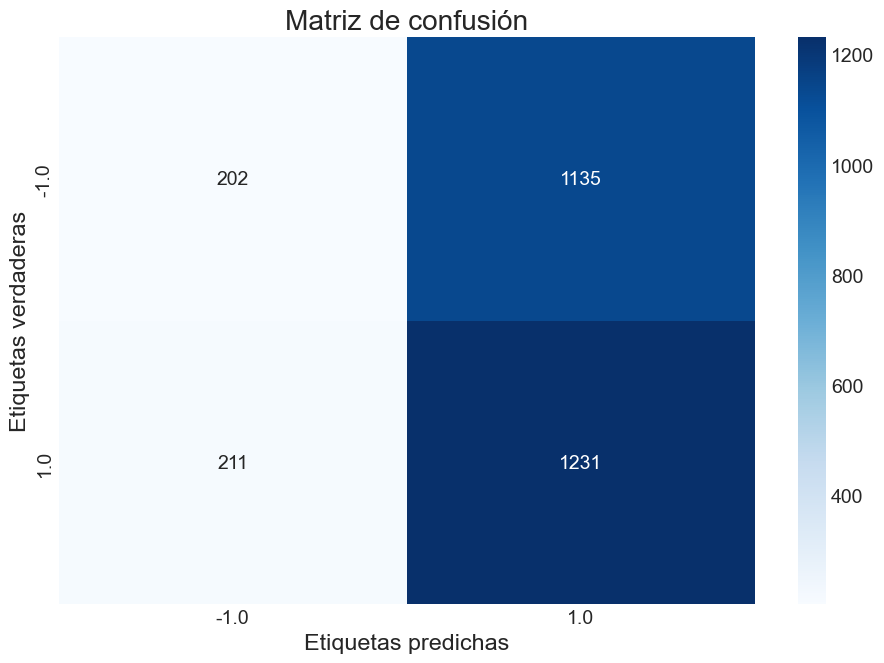

In [145]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()